# Análisis de los textos de El Señor de los Anillos y la Ley de Zipf

Este repositorio contiene un proyecto de análisis de datos en el que se exploran los tres libros de "El Señor de los Anillos" de J.R.R. Tolkien en relación con la _Ley de Zipf_.

La Ley de Zipf es una ley estadística que se aplica a los datos lingüísticos, especialmente en el análisis de la frecuencia de las palabras en un idioma. Matemáticamente, se puede representar con la ecuación:

$$ f(n) = \frac{C}{n^a} $$

Donde:

  * $ f(n) $ es la frecuencia de la palabra en el puesto $ n $,
  * $ C $ es una constante proporcional a la cantidad total de palabras,
  * $ a $ es aproximadamente 1.

Esta ley sugiere que la palabra más común en un idioma aparece aproximadamente dos veces más que la segunda más común, tres veces más que la tercera, y así sucesivamente. Este proyecto busca explorar cómo los textos de "El Señor de los Anillos" se ajustan a esta ley.

## Librerías

  * **Pandas**: es una librería de Python para análisis de datos y manipulación de datos. Proporciona herramientas para leer, procesar y analizar datos en una variedad de formatos, incluidos CSV, Excel, HTML y JSON.

  * **Colecciones**: es una biblioteca de Python que proporciona contenedores útiles para almacenar y administrar datos. Esta librería proporciona contenedores como listas, tuplas, diccionarios, conjuntos y deque (cola de doble extremo).

  * **Matplotlib**: es una biblioteca de Python para crear gráficos y visualizaciones. Esta biblioteca es una herramienta poderosa para generar gráficos de todo tipo, desde líneas simples hasta gráficos 3D.

  * **Seaborn**: es una biblioteca de Python para crear visualizaciones estadísticas avanzadas. Esta biblioteca se usa para crear gráficos como curvas de densidad, mapas de calor, diagramas de caja y más.

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns

## Funciones

In [2]:
def cleanwords(L):
    """
    Limpia una lista de palabras eliminando caracteres no deseados y convirtiendo a minúsculas.

    Parameters
    ----------
    L : list of str
        Lista de palabras a limpiar.

    Returns
    -------
    list of str
        Lista de palabras limpias en minúsculas.

    Notes
    -----
    Esta función elimina los espacios en blanco y ciertos caracteres de puntuación y control
    como '\n', ',', '(', ')', '[', ']', '.', ',', '_', "'s", '-', '?', '!', ';', y "'".
    También convierte todas las palabras a minúsculas para mantener la consistencia.
    """
    
    while '' in L:
        L.remove('')

    for c in ['\n', ',', '(', ')', '[', ']', '.', ',', '_', "'s", '-', '?', '!', ';', "'", "="]:
        L = [l.replace(c, '').lower() for l in L]

    return L

def readbook(book = "data/The Fellowship Of The Ring.txt"):
    """
    Lee un libro, realiza un análisis de frecuencia de palabras y devuelve un DataFrame con datos normalizados.

    Parameters
    ----------
    book : str, optional
        Ruta al archivo del libro a leer, por defecto es "data/01 - The Fellowship Of The Ring.txt".

    Returns
    -------
    DataFrame
        Un DataFrame de pandas que contiene dos columnas: 'Observed' con la frecuencia normalizada
        de cada palabra y 'Expected' con la frecuencia esperada según la Ley de Zipf.

    Notes
    -----
    Esta función utiliza `readbookwords` para obtener una lista de palabras limpias del libro.
    Luego, utiliza `collections.Counter` para contar la frecuencia de cada palabra.
    Los datos se normalizan dividiendo por la máxima frecuencia observada y se calcula la frecuencia
    esperada según la Ley de Zipf para cada palabra.
    """
    import pandas as pd
    import collections

    palabras = []

    with open(book, "r") as libro:
        for linea in libro:
            palabras.extend(cleanwords(linea.split(" ")))

    while '' in palabras:
        palabras.remove('')

    return palabras


def zipf(words, a = 1):
    """
    Genera y retorna un DataFrame con la frecuencia observada y esperada de palabras según la Ley de Zipf.

    Parameters
    ----------
    words : list of str, optional
        Lista de palabras para analizar, por defecto es 'palabras'.
    a : float, optional
        Exponente utilizado en la fórmula de la Ley de Zipf, por defecto es 1.

    Returns
    -------
    DataFrame
        Un DataFrame de pandas que contiene dos columnas: 'Observed' con la frecuencia normalizada
        de cada palabra y 'Expected' con la frecuencia esperada según la Ley de Zipf ajustada por el exponente 'a'.

    Notes
    -----
    Esta función calcula primero la frecuencia observada de las palabras y luego aplica la Ley de Zipf
    para calcular la frecuencia esperada. La frecuencia observada se normaliza dividiendo por la frecuencia
    máxima observada. La frecuencia esperada se calcula utilizando la fórmula 1/(x**a), donde 'x' es el
    rango de la palabra y 'a' es el exponente proporcionado.
    
    La lista de palabras se limpia inicialmente para eliminar cualquier cadena vacía antes del análisis.
    """

    while '' in words:
        words.remove('')

    data = pd\
        .DataFrame\
            .from_dict(collections.Counter(words),
                       orient='index',
                       columns=['Observed'])\
        .sort_values(by = 'Observed', ascending = False)

    data = data / data.max()
    
    data['Expected'] = [1/(x**a) for x in range(1, data.shape[0]+1)]
    
    return data
    

# def readbook(book="data/The Fellowship Of The Ring.txt"):
#     """
#     Lee un libro, realiza un análisis de frecuencia de palabras y devuelve un DataFrame con datos normalizados.

#     Parameters
#     ----------
#     book : str, optional
#         Ruta al archivo del libro a leer, por defecto es "data/01 - The Fellowship Of The Ring.txt".

#     Returns
#     -------
#     DataFrame
#         Un DataFrame de pandas que contiene dos columnas: 'Observed' con la frecuencia normalizada
#         de cada palabra y 'Expected' con la frecuencia esperada según la Ley de Zipf.

#     Notes
#     -----
#     Esta función utiliza `readbookwords` para obtener una lista de palabras limpias del libro.
#     Luego, utiliza `collections.Counter` para contar la frecuencia de cada palabra.
#     Los datos se normalizan dividiendo por la máxima frecuencia observada y se calcula la frecuencia
#     esperada según la Ley de Zipf para cada palabra.
#     """
    
#     import pandas as pd
#     import collections

#     palabras = []

#     with open(book, "r") as libro:
#         for linea in libro:
#             palabras.extend(cleanwords(linea.split(" ")))

#     while '' in palabras:
#         palabras.remove('')

#     data = pd\
#         .DataFrame\
#             .from_dict(collections.Counter(palabras),
#                        orient='index',
#                        columns=['Observed'])\
#         .sort_values(by='Observed', ascending=False)

#     data = data / data.max()
#     data['Expected'] = [1/x for x in range(1, data.shape[0]+1)]

#     return data


## Preparación de Datos

In [3]:
the_fellowship_of_the_ring = zipf(readbook(book = "../data/The Fellowship Of The Ring.txt"), a = 1.0)
the_two_towers = zipf(readbook(book = "../data/The Two Towers.txt"), a = 1.0)
the_return_of_the_king = zipf(readbook(book = "../data/The Return Of The King.txt"), a = 1.0)

## Cálculo de Frecuencias

In [4]:
the_return_of_the_king.head(25).style

,Observed,Expected
the,1.000000,1.000000
and,0.760517,0.500000
of,0.465563,0.333333
to,0.330148,0.250000
a,0.286214,0.200000
he,0.282601,0.166667
in,0.249155,0.142857
that,0.210465,0.125000
it,0.203822,0.111111
was,0.178884,0.100000


## Análisis de la Ley de Zipf

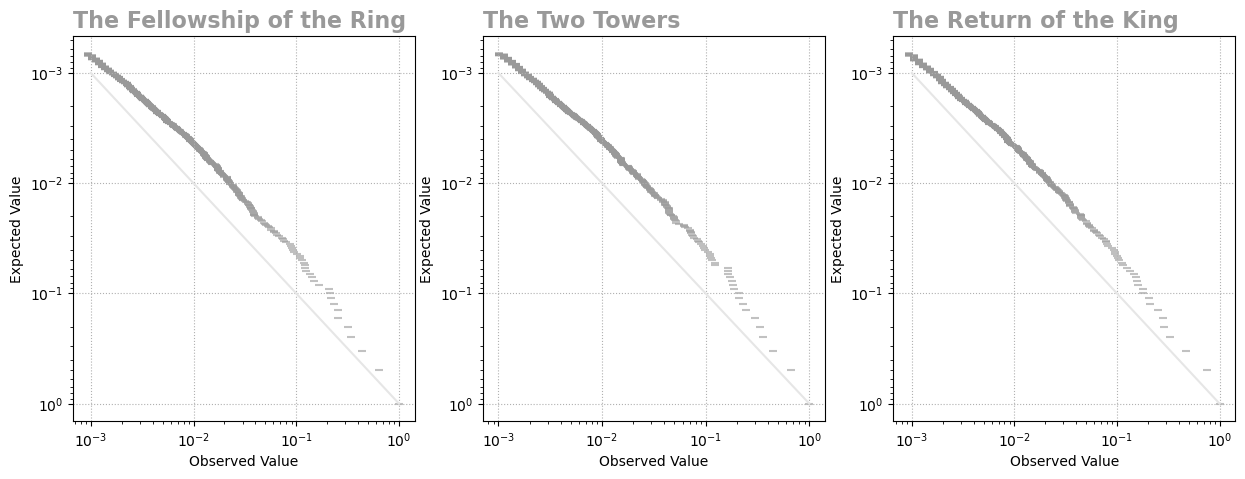

In [5]:
N = 1500

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))


for ax, data, title in zip([ax1,ax2,ax3], 
                           [the_fellowship_of_the_ring, the_two_towers,  the_return_of_the_king],
                           ['The Fellowship of the Ring', 'The Two Towers', 'The Return of the King']):

    ax.plot([0.001, 1], [0.001,1], color = '0.9')
    ax.scatter(data.iloc[:N,0], data.iloc[:N,1], marker = '_', color = '0.6', alpha = 0.6)
    
    ax.set_xlabel('Observed Value')
    ax.set_ylabel('Expected Value')

    ax.set_xscale("log", base=10)
    ax.set_yscale("log", base=10)
    ax.invert_yaxis()
    ax.set_title(title, loc = 'left', color = '0.6', fontweight = 700, fontsize = 16)
    ax.grid(linestyle = ':')

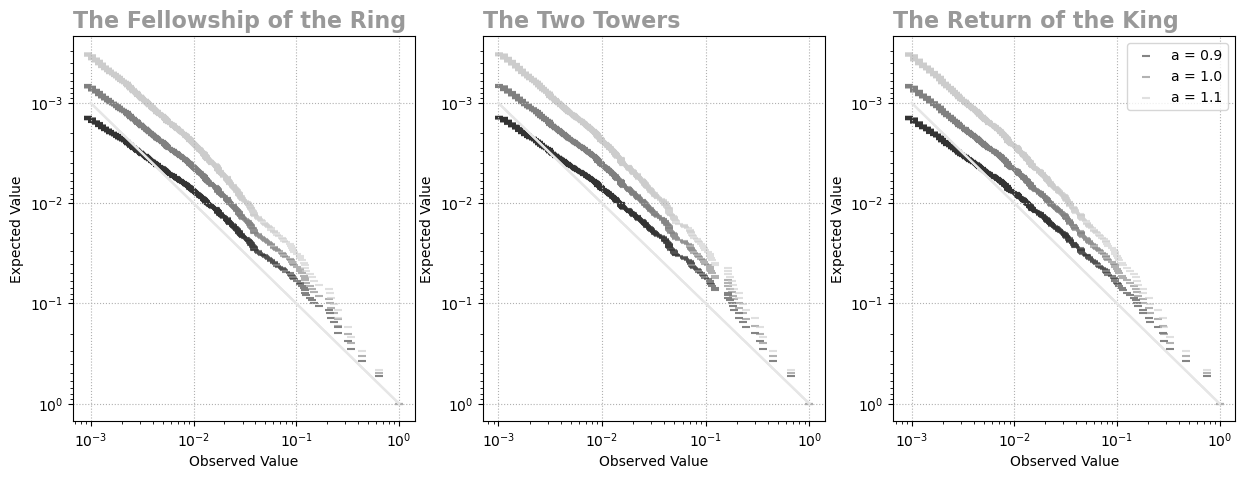

In [6]:
N = 1500

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))


for ax, title, book in zip([ax1,ax2,ax3], 
                           ['The Fellowship of the Ring', 'The Two Towers', 'The Return of the King'],
                           ['The Fellowship Of The Ring.txt', 'The Two Towers.txt', 'The Return Of The King.txt']):
    
    for a, color in zip([0.9, 1.0, 1.1], ['0.2', '0.5', '0.8']):
        
        data = zipf(readbook(book = "../data/" + book), a = a)

        ax.plot([0.001, 1], [0.001,1], color = '0.9')
        ax.scatter(data.iloc[:N,0], data.iloc[:N,1], marker = '_', color = color, alpha = 0.6, label = f"a = {a}")

        ax.set_xlabel('Observed Value')
        ax.set_ylabel('Expected Value')

        ax.set_xscale("log", base=10)
        ax.set_yscale("log", base=10)
        ax.invert_yaxis()
        ax.set_title(title, loc = 'left', color = '0.6', fontweight = 700, fontsize = 16)
        ax.grid(linestyle = ':')
        
        if title == 'The Return of the King':
            ax.legend()
            
fig.savefig('../figures/frequency-appearance-words.png')

In [7]:
from wordcloud import WordCloud

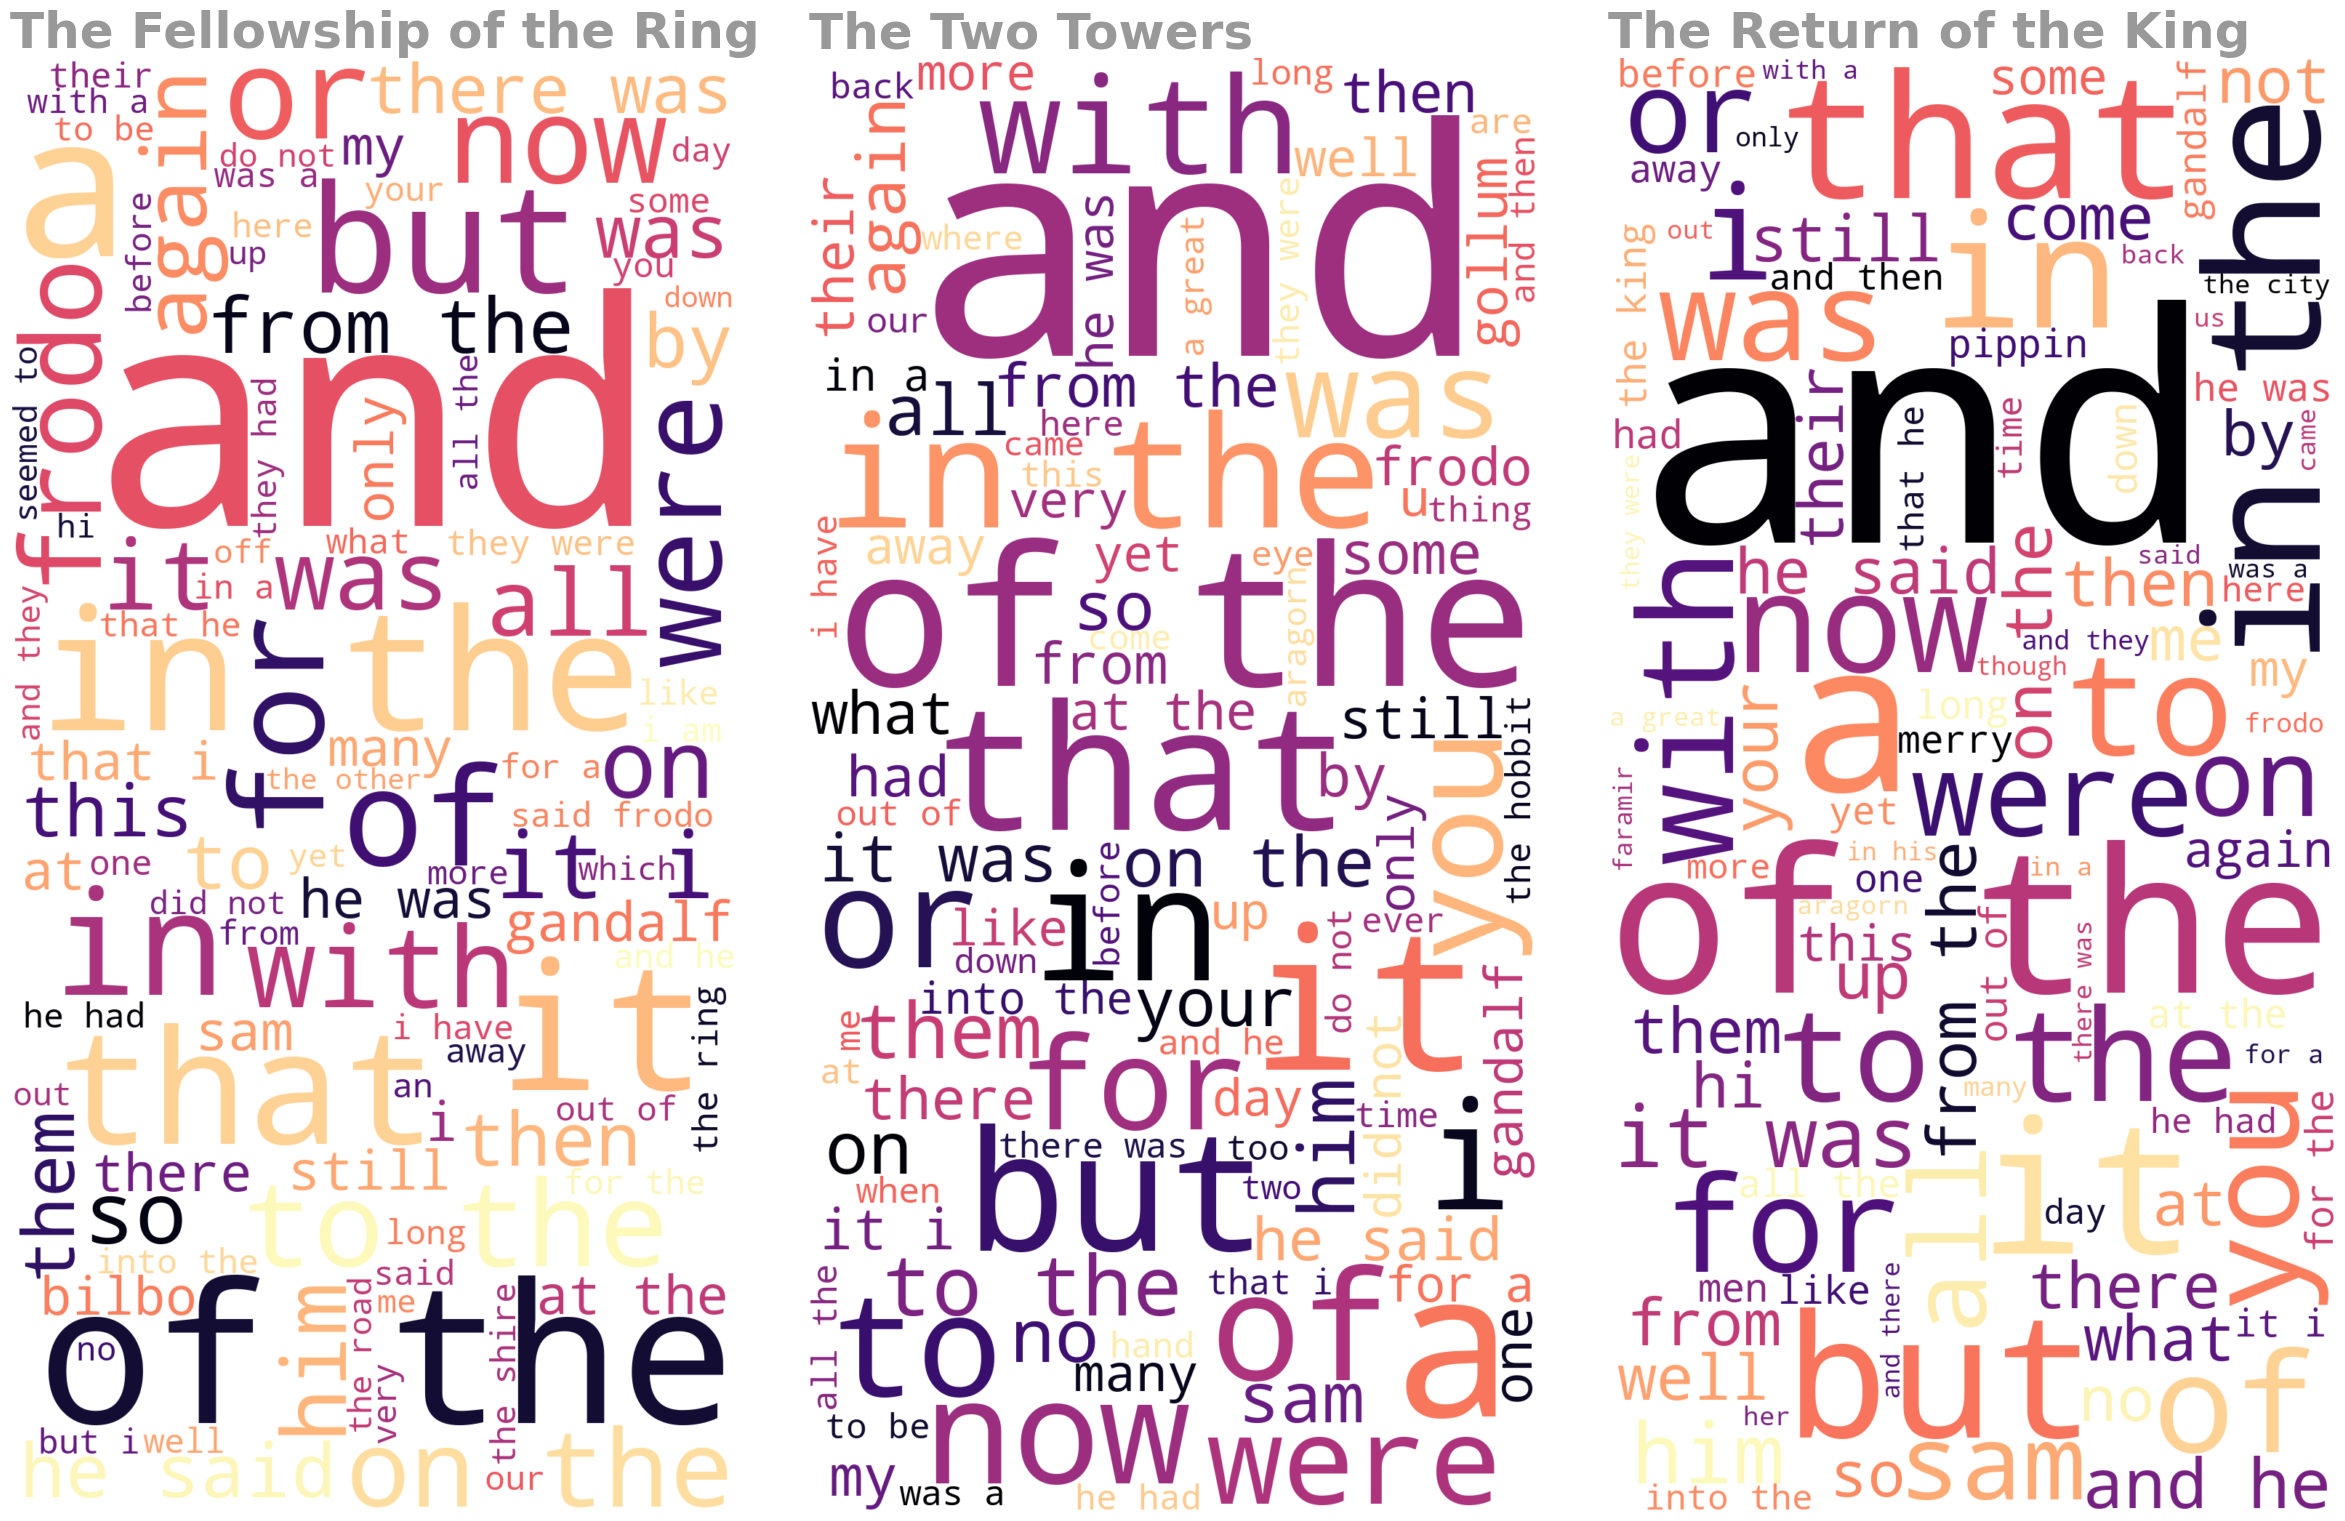

In [38]:
# https://python-charts.com/es/ranking/wordcloud-matplotlib/#google_vignette
# https://github.com/amueller/word_cloud

wc = WordCloud(width = 1000, height = 2000, 
               background_color = "white",
               max_words = 100,
               max_font_size = None, min_font_size = 4,
               include_numbers = False,
               stopwords = {''},
               colormap = "magma")

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 20))

for ax, book, title in zip([ax1,ax2,ax3], 
                           ['The Fellowship Of The Ring.txt', 'The Two Towers.txt', 'The Return Of The King.txt'],
                           ['The Fellowship of the Ring', 'The Two Towers', 'The Return of the King'],):

    wc.generate(' '.join(readbook(book = "../data/" + book)))

    ax.axis("off")
    ax.set_title(title, loc = 'left', color = '0.6', fontweight = 700, fontsize = 36)
    ax.imshow(wc, interpolation = "bilinear")
    
fig.subplots_adjust(wspace = 0.1)

fig.savefig('../figures/wordcloud-appearance-words.png')

In [30]:
readbook(book = "../data/" + book).count('the')

8581

In [14]:
the_fellowship_of_the_ring = readbook(book = "../data/The Fellowship Of The Ring.txt")
the_two_towers = readbook(book = "../data/The Two Towers.txt")
the_return_of_the_king = readbook(book = "../data/The Return Of The King.txt")

In [15]:
personajes = ['Gandalf', 'Aragorn', 'Frodo', 'Galadriel', 'Sauron', 'Gollum', 
              'Legolas', 'Arwen', 'Bilbo', 'Gimli', 'Elrond', 'Éowyn', 'Peregrin', 
              'Saruman', 'Sam', 'Boromir', 'Isildur', 'Faramir', ]

In [16]:
book1 = {}
book2 = {}
book3 = {}

for personaje in personajes:
    book1[personaje] = the_fellowship_of_the_ring.count(personaje.lower())
    book2[personaje] = the_two_towers.count(personaje.lower())
    book3[personaje] = the_return_of_the_king.count(personaje.lower())
    
    
print(book1); print(book2); print(book3)

{'Gandalf': 457, 'Aragorn': 207, 'Frodo': 1097, 'Galadriel': 39, 'Sauron': 59, 'Gollum': 70, 'Legolas': 94, 'Arwen': 8, 'Bilbo': 325, 'Gimli': 120, 'Elrond': 135, 'Éowyn': 0, 'Peregrin': 20, 'Saruman': 47, 'Sam': 395, 'Boromir': 153, 'Isildur': 39, 'Faramir': 1}
{'Gandalf': 344, 'Aragorn': 287, 'Frodo': 495, 'Galadriel': 22, 'Sauron': 33, 'Gollum': 331, 'Legolas': 176, 'Arwen': 0, 'Bilbo': 8, 'Gimli': 192, 'Elrond': 13, 'Éowyn': 10, 'Peregrin': 7, 'Saruman': 175, 'Sam': 414, 'Boromir': 93, 'Isildur': 18, 'Faramir': 131}
{'Gandalf': 302, 'Aragorn': 224, 'Frodo': 385, 'Galadriel': 22, 'Sauron': 47, 'Gollum': 24, 'Legolas': 67, 'Arwen': 9, 'Bilbo': 33, 'Gimli': 77, 'Elrond': 33, 'Éowyn': 97, 'Peregrin': 25, 'Saruman': 41, 'Sam': 457, 'Boromir': 27, 'Isildur': 16, 'Faramir': 161}


In [17]:
data = \
pd.concat([
    pd.DataFrame.from_dict(book1, orient = 'index'),
    pd.DataFrame.from_dict(book2, orient = 'index'),
    pd.DataFrame.from_dict(book3, orient = 'index')
], axis = 1,)

data.columns = ['The Fellowship of the Ring', 'The Two Towers', 'The Return of the King']
data = \
data.reset_index().rename(columns = {'index': 'Character'})\
    .melt(id_vars = 'Character', var_name = 'Book', value_name = 'Frequency')

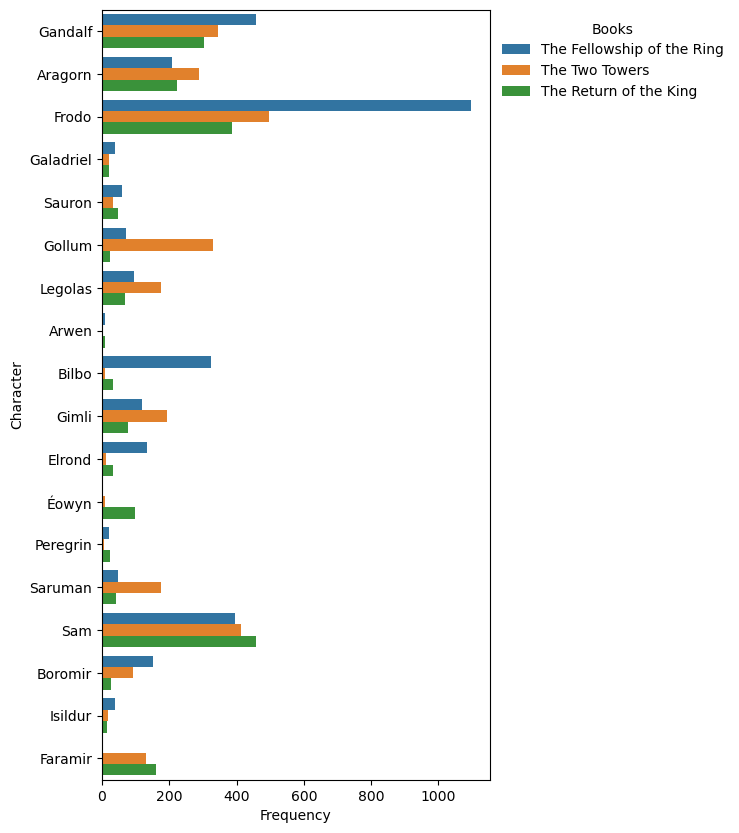

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,10))
sns.barplot(y = 'Character', x = 'Frequency', hue = 'Book', data = data, orient = 'h', ax = ax)
ax.legend(bbox_to_anchor = (1.0, 1.0), frameon = False, title = 'Books')
#ax.set_xscale("log", base=10)